# Modelo machine learning - Classificação de SPAM

Neste projeto fiz um modelo de classificação emails são real e spam base de dados tem total de 5172 linhas 3002 e colunas. No dataset existe uma coluna chamado de Prediction, essa coluna a ser classificado ela está como email para spam 0 para verdadeiro real 1.
Objetivo e classificar email que são spam e real.
Nesse projeto está tudo documentado os passos que fiz nesse projeto.

In [1]:
# Versão do python 
from platform import python_version

print('Versão python neste Jupyter Notebook:', python_version())

Versão python neste Jupyter Notebook: 3.8.8


In [2]:
# Importação das bibliotecas 

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

warnings.filterwarnings("ignore")

In [3]:
# Versões das bibliotecas

%reload_ext watermark
%watermark -a "Rafael Gallo" --iversions

Author: Rafael Gallo

matplotlib: 3.3.4
numpy     : 1.20.1
pandas    : 1.2.4
sys       : 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
seaborn   : 0.11.1



In [4]:
# Configuração dos gráficos

sns.set_palette("Accent")
sns.set(style="whitegrid", color_codes=True, font_scale=1.5)
color = sns.color_palette()

# Base dados 

In [6]:
# Carregando base dados
base = pd.read_csv("emails.csv")

# Visualizando os dados
base

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [7]:
# Exibindo os 5 primeiras linhas com o comando head()
base.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [8]:
# Exibindo os 5 últimos linhas com o comando tail()
base.tail()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1
5171,Email 5172,22,24,5,1,6,5,148,8,2,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Visualizando linhas colunas
base.shape

(5172, 3002)

In [10]:
# Info dos dados
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [11]:
# Exibindo os tipos de dados
base.dtypes

Email No.     object
the            int64
to             int64
ect            int64
and            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction     int64
Length: 3002, dtype: object

In [12]:
# Visualizando dados nulos
base.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [13]:
# Verificando dados duplicados
base.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5167    False
5168    False
5169    False
5170    False
5171    False
Length: 5172, dtype: bool

In [14]:
# Quantidade email spam e real

total = base.Prediction
print(total.head())

0    0
1    0
2    0
3    0
4    0
Name: Prediction, dtype: int64


In [15]:
# Retorna a variação imparcial
base.var()

the           137.945235
to             90.908132
ect           198.842192
and            36.553750
for            21.907283
                 ...    
military        0.019295
allowing        0.005205
ff              7.729530
dry             0.009621
Prediction      0.205950
Length: 3001, dtype: float64

# Análise dados

Text(0, 0.5, 'Total')

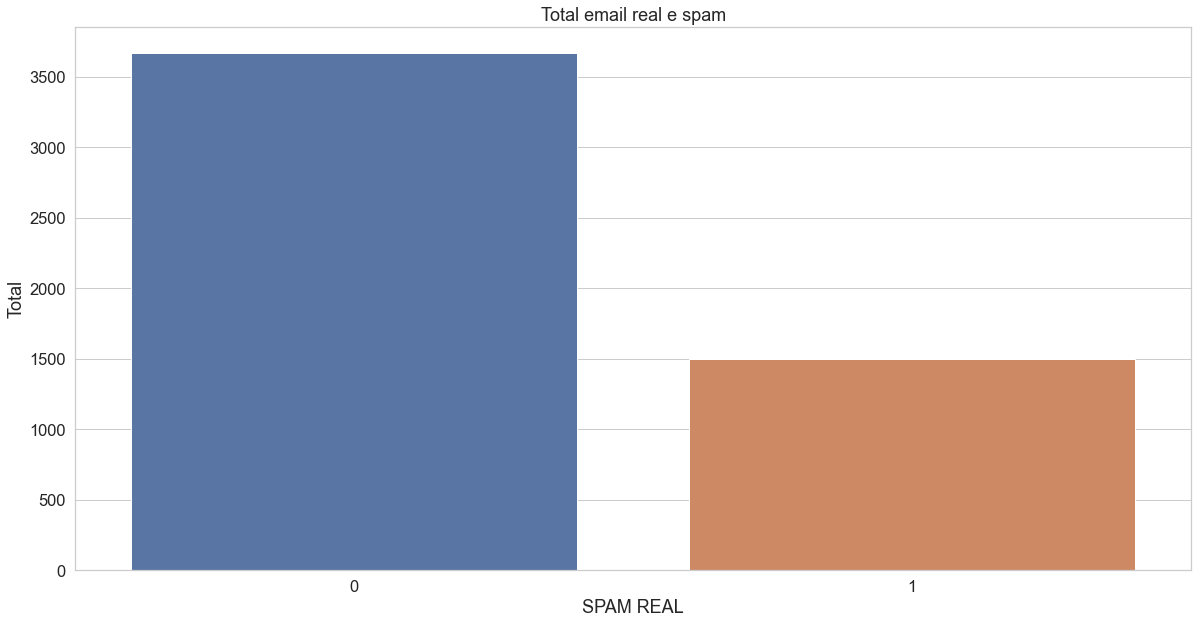

In [16]:
plt.figure(figsize=(20, 10))

plt.title("Total email real e spam")
sns.countplot(base["Prediction"])
plt.xlabel("SPAM REAL")
plt.ylabel("Total")

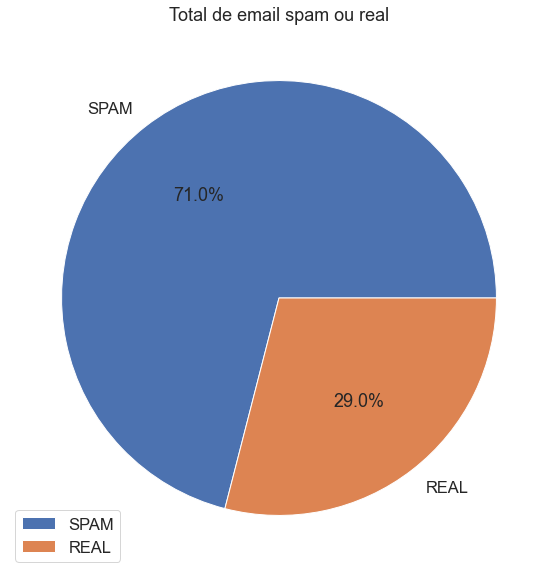

In [17]:
plt.figure(figsize=(20, 10))

plt.pie(base.groupby("Prediction")['Prediction'].count(), labels=["SPAM", "REAL"], autopct = "%1.1f%%");
plt.title("Total de email spam ou real")
plt.legend(["SPAM", "REAL"])

Text(0, 0.5, 'Total')

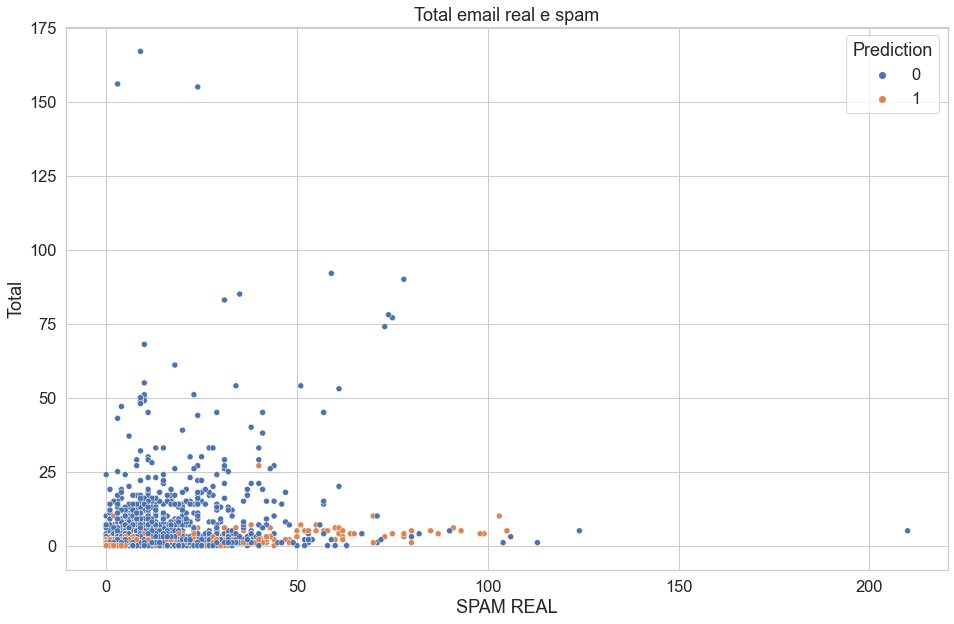

In [18]:
plt.figure(figsize=(15.8, 10))
ax = sns.scatterplot(x="the", y="hou", data = base, hue ="Prediction")
plt.title("Total email real e spam")
plt.xlabel("SPAM REAL")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

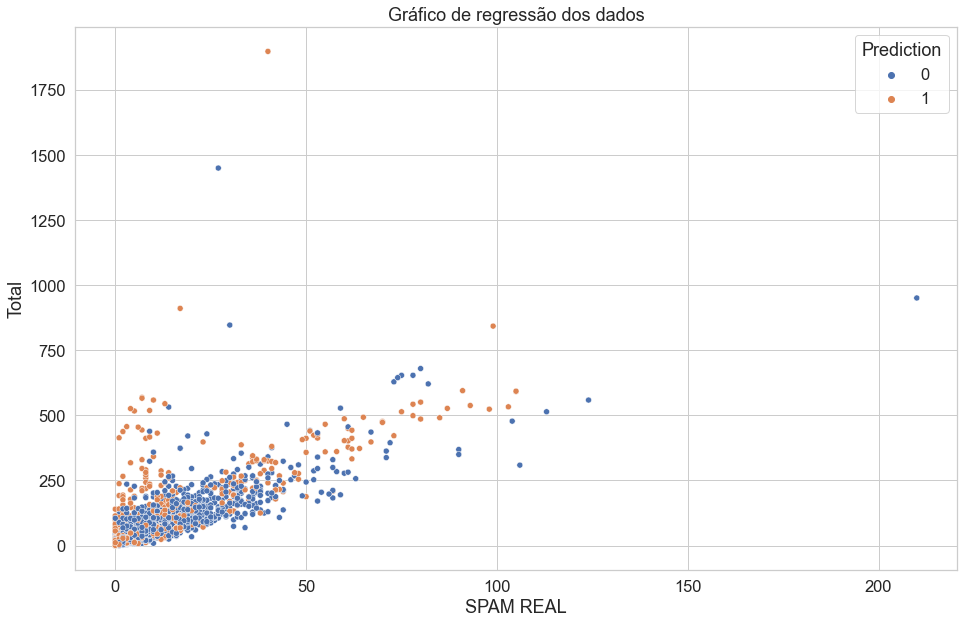

In [19]:
plt.figure(figsize=(15.8, 10))

ax = sns.scatterplot(x="the", y="a", data = base, hue ="Prediction")
plt.title("Gráfico de regressão dos dados")
plt.xlabel("SPAM REAL")
plt.ylabel("Total")

# Feature Engineering

- Praticamente todos os algoritmos de Aprendizado de Máquina possuem entradas e saídas. As entradas são formadas por colunas de dados estruturados, onde cada coluna recebe o nome de feature, também conhecido como variáveis independentes ou atributos. Essas features podem ser palavras, pedaços de informação de uma imagem, etc. Os modelos de aprendizado de máquina utilizam esses recursos para classificar as informações.



- As saídas, por sua vez, são chamadas de variáveis dependentes ou classe, e essa é a variável que estamos tentando prever. O nosso resultado pode ser 0 e 1 correspondendo a 'Não' e 'Sim' respectivamente, que responde a uma pergunta como: "Fulano é bom pagador?" ou a probabilidade de alguém comprar um produto ou não.

**Por exemplo, sedentarismo e fator hereditário são variáveis independentes para quando se quer prever se alguém vai ter câncer ou não**

In [20]:
from sklearn.preprocessing import LabelEncoder

for a in base.columns:
    if base[a].dtype == np.number:
        continue
    base[a] = LabelEncoder().fit_transform(base[a])
    
base.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1111,8,13,23,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,2222,0,0,0,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3333,0,5,21,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,4444,7,6,16,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


# Pré - processamento

- O processamento de dados começa com os dados em sua forma bruta e os converte em um formato mais legível (gráficos, documentos, etc.), dando-lhes a forma e o contexto necessários para serem interpretados por computadores e utilizados.

**Exemplo: Uma letra, um valor numérico. Quando os dados são vistos dentro de um contexto e transmite algum significado, tornam-se informações.**

- Treino e teste da base de dados da coluna prediction

In [21]:
# Defenindo base de treino e teste train e test

train = base.iloc[:,1:3001]
test = base.iloc[:,-1].values

In [22]:
# Visualizando linha e coluna da váriavel train
train.shape

(5172, 3000)

In [23]:
# Visualizando linha e coluna da váriavel test
test.shape

(5172,)

# Escalonamento dados

- Standard Scaler: padroniza um recurso subtraindo a média e escalando para a variância da unidade. 

- A variância da unidade significa dividir todos os valores pelo desvio padrão. StandardScaler resulta em uma distribuição com um desvio padrão igual a 1. A variância é igual a 1.

- Variância = desvio padrão ao quadrado. 

- E 1 ao quadrado = 1. 

- StandardScaler torna a média da distribuição aproximadamente 0.

In [24]:
# Escalonamento dos dados

# Importando biblioteca a biblioteca
from sklearn.preprocessing import StandardScaler

# Criando o escalonamento
model_scaler = StandardScaler()

# Treinamneto do escalonamento
model_scaler_fit = model_scaler.fit_transform(train)

# Visualizando linhas e colunas do escalonamento
model_scaler_fit.shape

array([[-0.59701422, -0.67459957, -0.39922238, ..., -0.05939558,
        -0.46268959, -0.07442245],
       [ 0.13198269,  0.75704542,  2.06177658, ..., -0.05939558,
         0.06674195, -0.07442245],
       [-0.59701422, -0.67459957, -0.39922238, ..., -0.05939558,
        -0.46268959, -0.07442245],
       ...,
       [-0.59701422, -0.67459957, -0.39922238, ..., -0.05939558,
        -0.46268959, -0.07442245],
       [-0.414765  ,  0.0962862 , -0.39922238, ..., -0.05939558,
         0.06674195, -0.07442245],
       [ 1.4077273 ,  1.96843734,  0.02877744, ..., -0.05939558,
        -0.46268959, -0.07442245]])

# Treino e teste do modelo

- Treino e teste do modelo machine learning
- 80 para dados de treino
- 20 para dados de teste


- train_test_split: O train test split ele define o conjunto de dados de treinamento os dados em float deve estar entre 0.0 e 1 vai ser definirá o conjunto de dados teste.


- test_size: E o tamanho do conjunto de teste para ser usando dados de teste 0.25 ou 25 por cento.
- random_state: Devisão dos dados ele um objeto para controla a randomização durante a devisão dos dados 

In [31]:
# Importação da biblioteca sklearn para treino e teste do modelo

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(train, # Variável x
                                                    test, # Variável y
                                                    test_size=0.2, # Divivindo os dados em 20% para treino e 80% para teste
                                                    random_state = 0) # Random state igual a zero

In [32]:
# Total de linhas e colunas e linhas dos dados de treino x
x_train.shape

(4137, 3000)

In [33]:
# Total de linhas dos dados de treino y
y_train.shape

(4137,)

In [34]:
# Total de linhas e colunas dos dados de treino x teste 
x_test.shape

(1035, 3000)

In [35]:
# Total de linhas e colunas dos dados de treino y teste 
y_test.shape

(1035,)

# Modelo machine learning 

- Modelo 01: K-NN

In [42]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knn_modelo = KNeighborsClassifier() # Nome do algoritmo M.L
knn_modelo_fit = knn_modelo.fit(x_train, y_train) # Treinamento do modelo
knn_modelo_score_1 = knn_modelo.score(x_train, y_train) # Score do modelo dados treino x
knn_modelo_score_2 = knn_modelo.score(x_train, y_train) # Score do modelo dados treino y

print("Treinamento base treino:", knn_modelo_score_1)
print("Treinamento base teste:", knn_modelo_score_2)

Treinamento base treino: 0.9129804205946338
Treinamento base teste: 0.9129804205946338
Wall time: 2.83 s


In [43]:
# Previsão do modelo
knn_modelo_pred = knn_modelo.predict(x_test)
knn_modelo_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

- Accuracy

Ela indica performance geral do modelo dentros todos as classificações quantas modelo classificou corretamente.

In [44]:
# Accuracy do modelo - K-NN
from sklearn.metrics import accuracy_score

accuracy_knn = accuracy_score(y_test, knn_modelo_pred)
print("Accuracy - K-NN: %.2f" % (accuracy_knn * 100))

Accuracy - K-NN: 85.41


**Matrix confusion ou Matriz de Confusão**

A matriz de confusão uma tabela que indica erros e acertos do modelo comparando com um resultado.

- Verdadeiros Positivos: A classificação da classe positivo.
- Falsos Negativos (Erro Tipo II): Erro em que o modelo previu a classe Negativo quando o valor real era classe Positivo;
- Falsos Positivos (Erro Tipo I): Erro em que o modelo previu a classe Positivo quando o valor real era classe Negativo
- Verdadeiros Negativos: Classificação correta da classe Negativo.

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

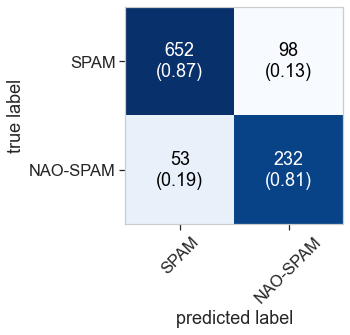

In [46]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

matrix_confusion_1 = confusion_matrix(y_test, knn_modelo_pred)
plot_confusion_matrix(matrix_confusion_1, show_normed=True, colorbar=False, class_names=['SPAM', 'NAO-SPAM']) 

**Curva roc** 

A curva roc ela exibir graficamente comparar a avaliar acurácia. As curvas roc integram três medidas precisão relacionadas a sensibilidade com os verdadeiro e positivo, especificidade com os verdadeiro negativo.

roc_auc 0.9204818713450292


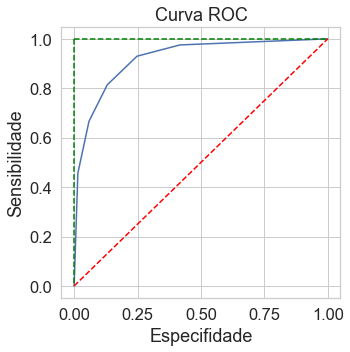

In [47]:
# Curva roc do modelo
from sklearn.metrics import roc_curve, roc_auc_score

roc = knn_modelo.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

# Classification report

- O visualizador do relatório de classificação exibe as pontuações de precisão, recuperação, F1 e suporte para o modelo. Para facilitar a interpretação e a detecção de problemas, o relatório integra pontuações numéricas com um mapa de calor codificado por cores. Todos os mapas de calor estão na faixa para facilitar a comparação fácil de modelos de classificação em diferentes relatórios de classificação.

In [48]:
from sklearn.metrics import classification_report

classification = classification_report(y_test, knn_modelo_pred)
print("Modelo -  KNN Classifier")
print()
print(classification)

Modelo -  KNN Classifier

              precision    recall  f1-score   support

           0       0.92      0.87      0.90       750
           1       0.70      0.81      0.75       285

    accuracy                           0.85      1035
   macro avg       0.81      0.84      0.83      1035
weighted avg       0.86      0.85      0.86      1035



# Métricas classificação

- **Precision score**: A precisão pode ser usada em uma situação em que os Falsos Positivos são considerados mais prejudiciais que os Falsos Negativos. Por exemplo, ao classificar uma ação como um bom investimento, é necessário que o modelo esteja correto, mesmo que acabe classificando bons investimentos como maus investimentos (situação de Falso Negativo) no processo. Ou seja, o modelo deve ser preciso em suas classificações, pois a partir do momento que consideramos um investimento bom quando na verdade ele não é, uma grande perda de dinheiro pode acontecer.


- **Recall score**: O recall pode ser usada em uma situação em que os Falsos Negativos são considerados mais prejudiciais que os Falsos Positivos. Por exemplo, o modelo deve de qualquer maneira encontrar todos os pacientes doentes, mesmo que classifique alguns saudáveis como doentes (situação de Falso Positivo) no processo. Ou seja, o modelo deve ter alto recall, pois classificar pacientes doentes como saudáveis pode ser uma tragédia.


- **Accuracy**: A acurácia é uma boa indicação geral de como o modelo performou. Porém, pode haver situações em que ela é enganosa. Por exemplo, na criação de um modelo de identificação de fraudes em cartões de crédito, o número de casos considerados como fraude pode ser bem pequeno em relação ao número de casos considerados legais. Para colocar em números, em uma situação hipotética de 280000 casos legais e 2000 casos fraudulentos, um modelo simplório que simplesmente classifica tudo como legal obteria uma acurácia de 99,3%. Ou seja, você estaria validando como ótimo um modelo que falha em detectar fraudes.


- **F1_Score**: O F1-Score é simplesmente uma maneira de observar somente 1 métrica ao invés de duas (precisão e recall) em alguma situação. É uma média harmônica entre as duas, que está muito mais próxima dos menores valores do que uma média aritmética simples. Ou seja, quando tem-se um F1-Score baixo, é um indicativo de que ou a precisão ou o recall está baixo.

In [49]:
# Métricas do modelo 

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision = precision_score(y_test, knn_modelo_pred)
Recall = recall_score(y_test, knn_modelo_pred)
Accuracy = accuracy_score(y_test, knn_modelo_pred)
F1_Score = f1_score(y_test, knn_modelo_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
2,Accuracy,0.854106
1,Recall,0.814035
3,F1_Score,0.754472
0,precision,0.703030


# Modelo 2 - Regressão logística

In [50]:
%%time
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr_fit = model_lr.fit(x_train, y_train)
model_lr_score = model_lr.score(x_train, y_train)

print("Modelo - Regressão logistica: %.2f" % (model_lr_score * 100))

Modelo - Regressão logistica: 98.74
Wall time: 1.36 s


In [51]:
# Previsão do modelo

model_lr_pred = model_lr.predict(x_test)
model_lr_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
# Accuracy do modelo
accuracy_regression_logistic = accuracy_score(y_test, model_lr_pred)

print("Accuracy - Logistic regression: %.2f" % (accuracy_regression_logistic * 100))

Accuracy - Logistic regression: 96.14


In [53]:
# Classification report

classification = classification_report(y_test, model_lr_pred)
print("Modelo -  Logistic Regression")
print()
print(classification)

Modelo -  Logistic Regression

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       750
           1       0.92      0.94      0.93       285

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

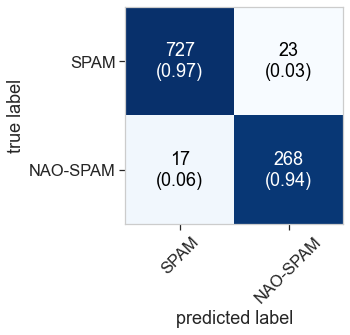

In [54]:
# Matrix confusion do modelo
matrix_confusion_2 = confusion_matrix(y_test, model_lr_pred)
plot_confusion_matrix(matrix_confusion_2, show_normed=True, colorbar=False, class_names=['SPAM', 'NAO-SPAM'])

roc_auc 0.990629239766082


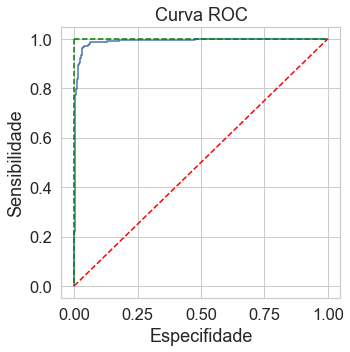

In [55]:
# A Curva roc
from sklearn.metrics import roc_curve, roc_auc_score

roc = model_lr.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [56]:
# Metricas 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision = precision_score(y_test, model_lr_pred)
Recall = recall_score(y_test, model_lr_pred)
Accuracy = accuracy_score(y_test, model_lr_pred)
F1_Score = f1_score(y_test, model_lr_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
2,Accuracy,0.961353
1,Recall,0.940351
3,F1_Score,0.930556
0,precision,0.920962


# Modelo 03 - Decision tree

In [57]:
%%time
from sklearn.tree import DecisionTreeClassifier

modelo_arvore_cla_1 = DecisionTreeClassifier(max_depth=4, random_state=0)
modelo_arvore_cla_fit = modelo_arvore_cla_1.fit(x_train, y_train)
modelo_arvore_scor = modelo_arvore_cla_1.score(x_train, y_train)

print("Modelo - Decision Tree Classifier: %.2f" % (modelo_arvore_scor * 100))

Modelo - Decision Tree Classifier: 85.45
Wall time: 518 ms


In [58]:
# Previsão do modelo

modelo_arvore_pred = modelo_arvore_cla_1.predict(x_test)
modelo_arvore_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [59]:
# Accuracy do modelo previsão
accuracy_decision_tree = accuracy_score(y_test, modelo_arvore_pred)

print("Acuracia - Decision Tree: %.2f" % (accuracy_decision_tree * 100))

Acuracia - Decision Tree: 85.80


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

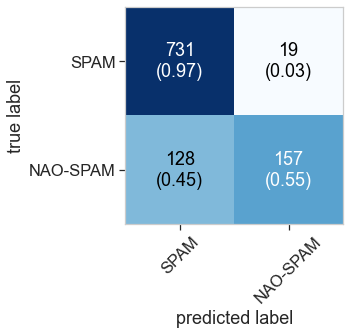

In [60]:
# Matrix confusion do modelo
matrix_confusion_3 = confusion_matrix(y_test, modelo_arvore_pred)
plot_confusion_matrix(matrix_confusion_3, show_normed=True, colorbar=False, class_names=['SPAM', 'NAO-SPAM'])

In [61]:
# Classification report
class_report = classification_report(y_test, modelo_arvore_pred)
print("Modelo - Decision Tree")
print("\n")
print(class_report)

Modelo - Decision Tree


              precision    recall  f1-score   support

           0       0.85      0.97      0.91       750
           1       0.89      0.55      0.68       285

    accuracy                           0.86      1035
   macro avg       0.87      0.76      0.79      1035
weighted avg       0.86      0.86      0.85      1035



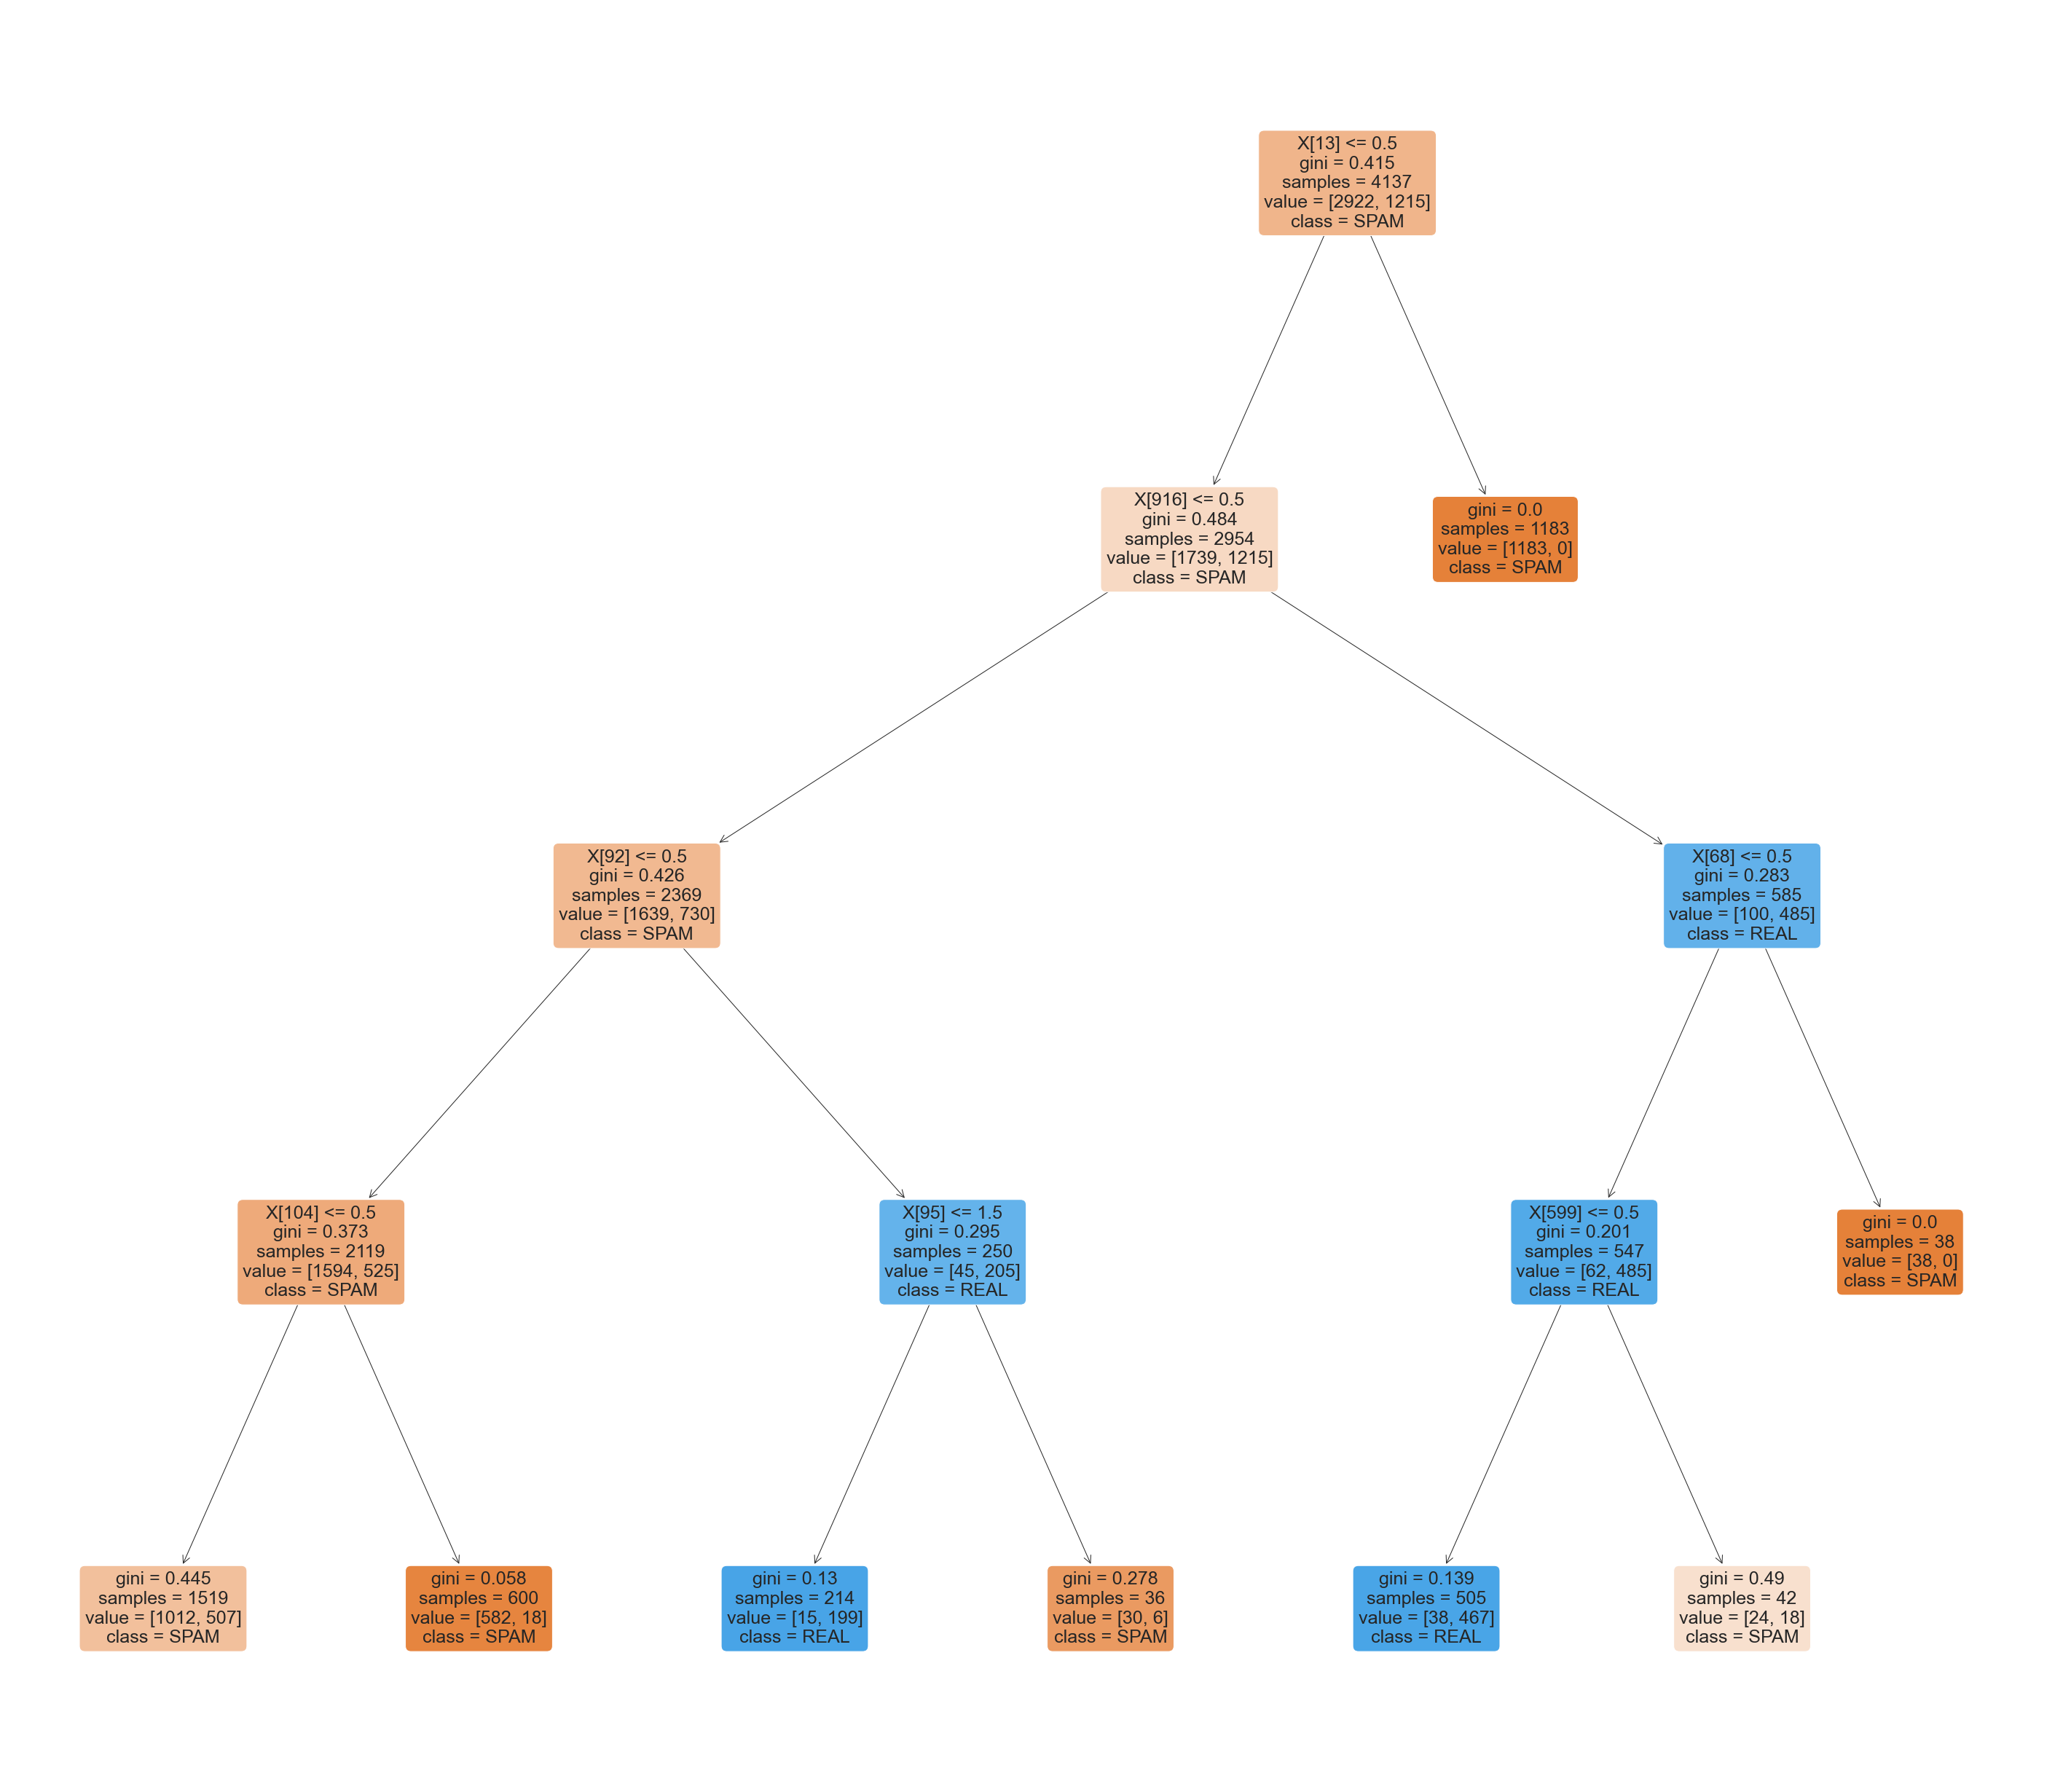

In [62]:
# Gráfico da árvore 
from sklearn import tree

fig, ax = plt.subplots(figsize=(50.5, 45), facecolor = "w")
tree.plot_tree(modelo_arvore_cla_1, 
               ax = ax, 
               fontsize = 25.18, 
               rounded = True, 
               filled = True, 
               class_names = ["SPAM", "REAL"])
plt.show()

roc_auc 0.889548538011696


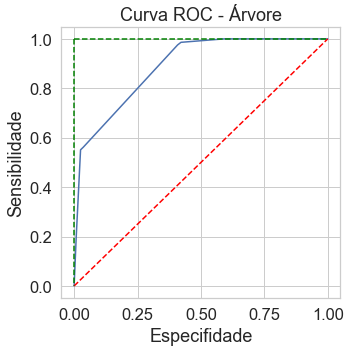

In [63]:
# Curva ROC - Árvore
roc = modelo_arvore_cla_1.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC - Árvore')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [64]:
# Métricas do modelo
precision = precision_score(y_test, modelo_arvore_pred)
Recall = recall_score(y_test, modelo_arvore_pred)
Accuracy = accuracy_score(y_test, modelo_arvore_pred)
F1_Score = f1_score(y_test, modelo_arvore_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
0,precision,0.892045
2,Accuracy,0.857971
3,F1_Score,0.681128
1,Recall,0.550877


# Modelo 04 - Naive bayes

In [65]:
%%time
from sklearn.naive_bayes import GaussianNB

model_naive_bayes = GaussianNB()
model_naive_bayes_fit = model_naive_bayes.fit(x_train, y_train)
model_naive_bayes_score = model_naive_bayes.score(x_train, y_train)
print("Modelo - Naive Bayes: %.2f" % (model_naive_bayes_score * 100))

Modelo - Naive Bayes: 96.64
Wall time: 712 ms


In [66]:
# Previsão do modelo - Naive bayes

model_naive_bayes_pred_predict = model_naive_bayes.predict(x_test)
model_naive_bayes_pred_predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [67]:
# Previsão com função probabiliestico do modelo - Naive bayes
model_naive_bayes_pred = model_naive_bayes.predict_proba(x_test)
model_naive_bayes_pred

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [68]:
# Accuracy score do modelo
accuracy_naive_bayes = accuracy_score(y_test, model_naive_bayes_pred_predict)

print("Accuracy Naive bayes: %.2f" % (accuracy_naive_bayes * 100))

Accuracy Naive bayes: 95.75


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

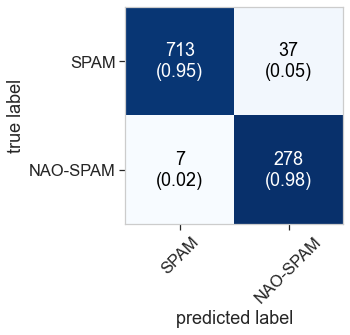

In [69]:
# Matrix confusion
matrix_confusion_4 = confusion_matrix(y_test, model_naive_bayes_pred_predict)
plot_confusion_matrix(matrix_confusion_4, show_normed=True, colorbar=False, class_names=['SPAM', 'NAO-SPAM'])

roc_auc 0.9629216374269005


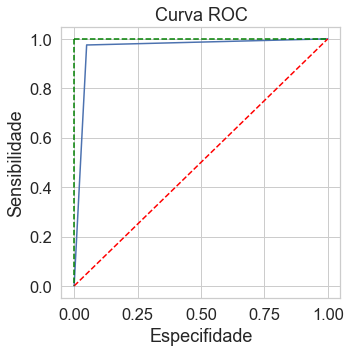

In [70]:
# Curva roc do modelo

roc = model_naive_bayes.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [71]:
# Classification report
class_report = classification_report(y_test, model_naive_bayes_pred_predict)
print("Modelo 04 - Naive Bayes")
print("\n")
print(class_report)

Modelo 04 - Naive Bayes


              precision    recall  f1-score   support

           0       0.99      0.95      0.97       750
           1       0.88      0.98      0.93       285

    accuracy                           0.96      1035
   macro avg       0.94      0.96      0.95      1035
weighted avg       0.96      0.96      0.96      1035



In [72]:
# Métricas do modelo - Naive Bayes

precision = precision_score(y_test, model_naive_bayes_pred_predict)
Recall = recall_score(y_test, model_naive_bayes_pred_predict)
Accuracy = accuracy_score(y_test, model_naive_bayes_pred_predict)
F1_Score = f1_score(y_test, model_naive_bayes_pred_predict)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
1,Recall,0.975439
2,Accuracy,0.957488
3,F1_Score,0.926667
0,precision,0.882540


# Modelo 5 - Gradient Boosting

In [73]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

model_gradient_boosting = GradientBoostingClassifier()
model_gradient_boosting_fit = model_gradient_boosting.fit(x_train, y_train)
model_gradient_boosting_score = model_gradient_boosting.score(x_train, y_train)
print("Modelo - Naive Bayes: %.2f" % (model_gradient_boosting_score * 100))

Modelo - Naive Bayes: 98.40
Wall time: 29.3 s


In [74]:
# Previsão do modelo - Gradient Boosting

model_gradient_boosting_pred = model_gradient_boosting.predict(x_test)
model_gradient_boosting_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [75]:
# Accuracy do modelo 
accuracy_model_gradient_boosting = accuracy_score(y_test, model_gradient_boosting_pred)

print("Acurácia - Gradient boosting: %.2f" % (accuracy_model_gradient_boosting * 100))

Acurácia - Gradient boosting: 95.65


In [76]:
# Classification report
classification = classification_report(y_test, model_gradient_boosting_pred)

print("Modelo 05 - Gradient boosting")
print("\n")
print(classification)

Modelo 05 - Gradient boosting


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       750
           1       0.93      0.92      0.92       285

    accuracy                           0.96      1035
   macro avg       0.95      0.94      0.95      1035
weighted avg       0.96      0.96      0.96      1035



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

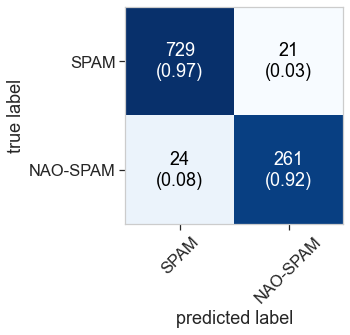

In [77]:
# Matrix confusion do modelo 
matrix_confusion_5 = confusion_matrix(y_test, model_gradient_boosting_pred)
plot_confusion_matrix(matrix_confusion_5, show_normed=True, colorbar=False, class_names=['SPAM', 'NAO-SPAM'])

roc_auc 0.9932350877192982


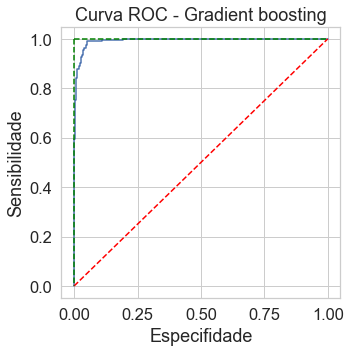

In [78]:
# Curva ROC - Gradient boosting
roc = model_gradient_boosting.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC - Gradient boosting')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [79]:
# Métricas do modelo 
precision = precision_score(y_test, model_gradient_boosting_pred)
Recall = recall_score(y_test, model_gradient_boosting_pred)
Accuracy = accuracy_score(y_test, model_gradient_boosting_pred)
F1_Score = f1_score(y_test, model_gradient_boosting_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
2,Accuracy,0.956522
0,precision,0.925532
3,F1_Score,0.920635
1,Recall,0.915789


In [83]:
# Resultados - Modelos machine learning

modelos = pd.DataFrame({
    
    "Models" :["K-NN", 
               "Regression Logistic", 
               "Decision tree", 
               "Naive bayes",
               "Gradient boosting"],

    "Acurácia" :[accuracy_knn, 
                 accuracy_regression_logistic, 
                 accuracy_decision_tree, 
                 accuracy_naive_bayes,
                 accuracy_model_gradient_boosting]})

modelos_1 = modelos.sort_values(by = "Acurácia", ascending = True)
modelos_1.to_csv("modelos_1.csv")
modelos_1

,Models,Acurácia
0,K-NN,0.854106
2,Decision tree,0.857971
4,Gradient boosting,0.956522
3,Naive bayes,0.957488
1,Regression Logistic,0.961353


In [84]:
# Salvando modelo Machine learning

import pickle    
    
with open('model_lr_pred.pkl', 'wb') as file:
    pickle.dump(model_lr_pred, file)
    
with open('model_naive_bayes_pred_predict.pkl', 'wb') as file:
    pickle.dump(model_naive_bayes_pred_predict, file)
    
with open('model_gradient_boosting_pred.pkl', 'wb') as file:
    pickle.dump(model_gradient_boosting_pred, file)

# Conclusão modelo

Nesse projeto eu fiz um modelo que faz classificação de email e spam ele classificar emails verdadeiros e não pela matriz de confussão para spam deu 1111 e para real 441 nesse objetivo era classificar spam.
Na outra parte do modelo eu fiz um pipeline para otimização do modelo para não ter overfitting no primeiro modelo que foi o Regression Logistic ele ficou com uma acurácia de 94% e com o pipeline deu 93% ficar sem overfitting.